In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.optimizers import RMSprop
from keras_tqdm import TQDMNotebookCallback
from keras.callbacks import EarlyStopping
from keras.layers import Flatten, Reshape, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import UpSampling2D
from keras import backend as K
K.set_image_dim_ordering('tf')
import matplotlib.pyplot as plt

C:\Users\Marcelo\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# For reproducibility
np.random.seed(42)

In [3]:
# Load the dataset
(X_train_init, Y_train_init), (X_test_init, Y_test_init) = cifar10.load_data()

In [4]:
def crop_center(img,cropx,cropy):
    y,x,c = img.shape
    startx = x//2 - cropx//2
    starty = y//2 - cropy//2
    cropped_img = np.copy(img[starty:starty+cropy, startx:startx+cropx, :])
    for k in range(len(img)):
        for p in range(len(img)):
            if (starty <= k < starty + cropy) and (startx <= p < startx + cropx):
                img[p][k] = (255, 255, 255)
            else:
                img[p][k] = img[p][k]
    return (img, cropped_img)

In [5]:
X_train = []
Y_train = []
for i in X_train_init:
    img = crop_center(i, 16, 16)
    X_train.append(img[0])
    Y_train.append(img[1])

In [6]:
X_test = []
Y_test = []
for i in X_test_init:
    img = crop_center(i, 16, 16)
    X_test.append(img[0])
    Y_test.append(img[1])

In [7]:
X_train_array = np.array(X_train)
Y_train_array = np.array(Y_train)
X_test_array = np.array(X_test)
Y_test_array = np.array(Y_test)

In [8]:
def euclidean_distance_loss(y_true, y_pred):
    """
    Euclidean distance loss
    https://en.wikipedia.org/wiki/Euclidean_distance
    :param y_true: TensorFlow/Theano tensor
    :param y_pred: TensorFlow/Theano tensor of the same shape as y_true
    :return: float
    """
    return K.sqrt(K.sum(K.square(y_pred - y_true), axis=-1))

def autoencoder():
    #encoder
    #input = 32 x 32 x 3 (wide and thin)
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Conv2D(64, (4, 4), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(BatchNormalization(momentum=0.80))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(4096))
    #decoder
    model.add(Reshape((8,8,64)))
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D(size = (2,2))) # 16 x 16 x 32
    model.add(Conv2D(3, (5, 5), activation='relu', padding='same')) 
    model.compile(loss=euclidean_distance_loss, optimizer = "adam" )
    return model

In [9]:
model = autoencoder()

In [10]:
model.fit(X_train_array, Y_train_array, validation_data=(X_test_array, Y_test_array), epochs=50, batch_size=128, verbose=0, callbacks=[TQDMNotebookCallback(leave_inner=True, leave_outer=True)])

In [11]:
def append_image(img,cropped_image, cropx, cropy):
    y,x,c = img.shape
    startx = x//2 - cropx//2
    starty = y//2 - cropy//2
    img_copy = np.copy(img)
    for k in range(len(img)):
        for p in range(len(img)):
            if (starty <= k < starty + cropy) and (startx <= p < startx + cropx):
                img_copy[p][k] = cropped_image[p - starty][k - startx]
            else:
                img_copy[p][k] = img_copy[p][k]
    return img_copy

In [12]:
def print_result(img):
    prediction = model.predict(np.array([img]).astype(int))
    result = append_image(img.astype(int), prediction[0], 16, 16)
    plt.imshow(result)
    
def print_original(img, img_cropped):
    result = append_image(img.astype(int), img_cropped.astype(int), 16, 16)
    plt.imshow(result)

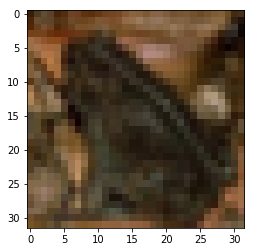

In [13]:
print_original(X_test[30], Y_test[30])

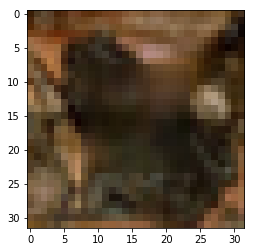

In [14]:
print_result(X_test[30])

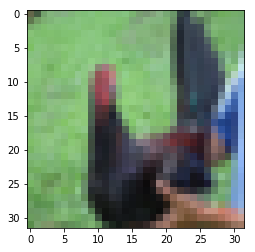

In [15]:
print_original(X_test[25], Y_test[25])

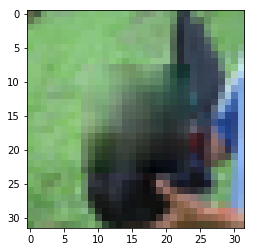

In [16]:
print_result(X_test[25])

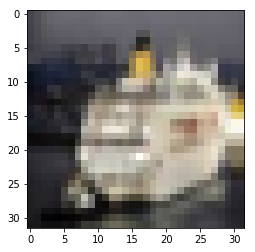

In [17]:
print_original(X_test[260], Y_test[260])

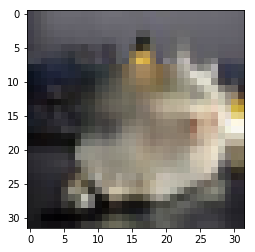

In [18]:
print_result(X_test[260])

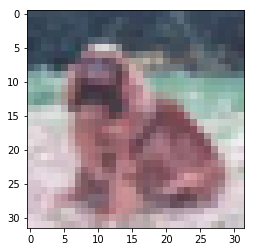

In [19]:
print_original(X_test[101], Y_test[101])

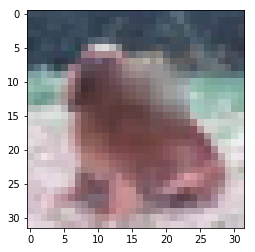

In [20]:
print_result(X_test[101])

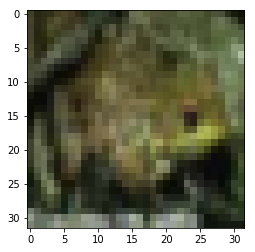

In [21]:
print_original(X_test[107], Y_test[107])

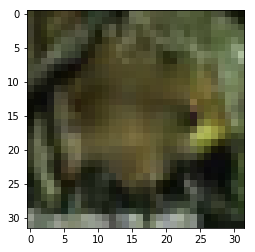

In [22]:
print_result(X_test[107])

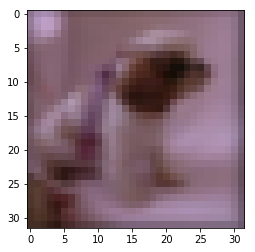

In [23]:
print_original(X_test[178], Y_test[178])

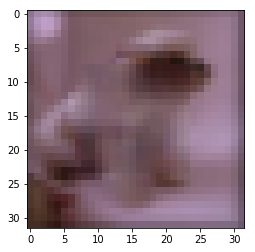

In [24]:
print_result(X_test[178])

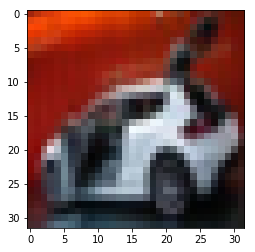

In [25]:
print_original(X_test[6], Y_test[6])

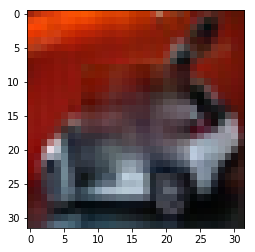

In [26]:
print_result(X_test[6])